In [18]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/CNNProjects/StreetMarketing'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
import h5py
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import AveragePooling2D,Conv2D,Dense,Activation,BatchNormalization,Reshape,Dropout,Flatten,MaxPooling2D
from keras import optimizers
from keras.optimizers import Adam,Adagrad,SGD
from keras.callbacks import Callback,CallbackList
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from __future__ import absolute_import, division, print_function
import numpy as np
from sklearn.model_selection import train_test_split
import os
import glob
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from keras.utils import np_utils
from keras import optimizers
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", message="Numerical issues were encountered ")

# Project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network**




In [20]:
filename = '/content/gdrive/My Drive/CNNProjects/StreetMarking/SVHN_single_grey1.h5'
f = h5py.File(filename)
list(f)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

# Data Understanding and fetching. Plotting of images

In [0]:
X_train = f['X_train']
y_train = f['y_train']
X_val = f['X_val']
y_val = f['y_val']
X_test = f['X_test']
y_test = f['y_test']

In [22]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
print (X_val.shape)
print (y_val.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


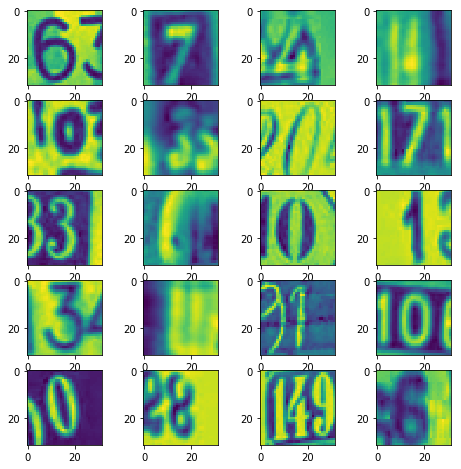

In [0]:
# Plotting Images from train set
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
plt.show()

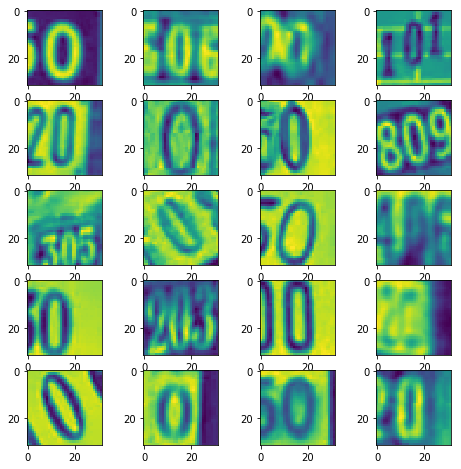

In [0]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_val[i])
plt.show()

In [0]:
y_train[:]

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

In [0]:
y_test[:]

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

In [0]:
#Flatting/reshaping the train and test set images

Train_X = []
for i in range(42000):
  Train_X.append(X_train[i,:].flatten())
Test_X = []
for i in range(18000):
  Test_X.append(X_test[i,:].flatten())

In [9]:
print (len(Train_X),Train_X[0])
print (len(Test_X),Test_X[0])

42000 [33.0704 30.2601 26.852  ... 49.6682 50.853  53.0377]
18000 [ 40.558   46.7917  48.9764 ... 110.0169 111.2017 114.1906]


# Implement and apply an optimal k-Nearest Neighbor (kNN) classifier

In [0]:
kVals = range(1, 30, 2)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier

for k in range(1, 30, 2):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(Train_X, y_train)
          # evaluate the model and update the accuracies list
          score = model.score(Test_X, y_test)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)
          
# find the value of k that has the largest accuracy

i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on test data" % (kVals[i],
accuracies[i] * 100))


k=1, accuracy=45.92%
k=3, accuracy=46.18%
k=5, accuracy=49.02%
k=7, accuracy=50.71%
k=9, accuracy=51.24%
k=11, accuracy=51.80%
k=13, accuracy=52.11%
k=15, accuracy=52.36%
k=17, accuracy=52.87%
k=19, accuracy=52.72%
k=21, accuracy=52.91%
k=23, accuracy=52.98%
k=25, accuracy=52.97%
k=27, accuracy=53.23%
k=29, accuracy=53.16%
k=27 achieved highest accuracy of 53.23% on test data


In [0]:
pipeline_model = Pipeline('sc',StandardScalar())

In [10]:

# re-train our classifier using the best k value and predict the labels of the
# test data

model = KNeighborsClassifier(n_neighbors=27)
model.fit(Train_X, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

In [17]:
## KNN MODEL Accuracy
model.score(Test_X,y_test)

0.5322777777777777

In [0]:
y_pred = model.predict(Test_X)

In [0]:

from sklearn.metrics import classification_report,confusion_matrix

In [16]:
# Metrics for KNN Classifier
print (classification_report(y_pred,y_test))
print (confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.46      0.56      2829
           1       0.73      0.46      0.56      2934
           2       0.54      0.64      0.58      1522
           3       0.43      0.47      0.45      1587
           4       0.65      0.64      0.65      1849
           5       0.40      0.53      0.45      1343
           6       0.41      0.51      0.46      1481
           7       0.62      0.71      0.66      1602
           8       0.37      0.47      0.41      1408
           9       0.44      0.55      0.49      1445

    accuracy                           0.53     18000
   macro avg       0.53      0.54      0.53     18000
weighted avg       0.57      0.53      0.54     18000

[[1289   96   90  121  102  144  310  101  255  321]
 [  60 1337  249  267  253  164  127  197  134  146]
 [  31   54  971  118   32   49   31  115   60   61]
 [  44   82   92  742   53  244   62   79  107   82]
 [  51   80   48   57 1183   

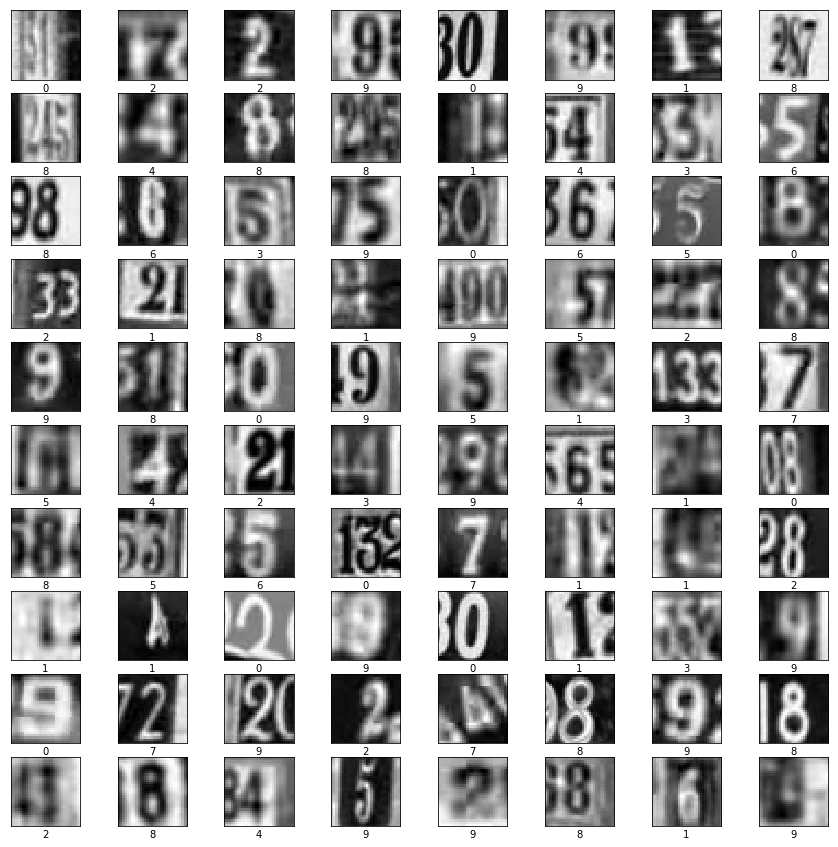

In [105]:
# Plotting the images predicted with the labels.
plt.figure(figsize=(15,15))
for i in range(80):
    plt.subplot(10,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_pred[i])
plt.show()

#  Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations)

In [23]:
X_train = f['X_train']
y_train = f['y_train']
X_val = f['X_val']
y_val = f['y_val']
X_test = f['X_test']
y_test = f['y_test']


print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
print (X_val.shape)
print (y_val.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


In [0]:
#  Converting labels to categorical
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_val = np_utils.to_categorical(y_val)

In [0]:
# Normalize the data
X_train = X_train[:]/255
X_test = X_test[:]/255
X_val = X_val[:]/255

In [0]:
# Model 1 - Vanilla DNN with 3 dense layers to determine the impact of DNN on image classification. Using Activation layer as relu with Batch Normalization


In [0]:
Train = True
EPOCHS = 50
batch = 32
filepath = '/content/gdrive/My Drive/CNNProjects/StreetMarking/weights_best_model1_DNN.h5'

In [0]:
if Train:
  model1_DNN = Sequential()
  model1_DNN.add(BatchNormalization())
  model1_DNN.add(Reshape((1024,),input_shape = (32,32,)))
  model1_DNN.add(Dense(60,activation='relu'))
  model1_DNN.add(BatchNormalization())
  model1_DNN.add(Dense(50,activation='relu'))
  model1_DNN.add(BatchNormalization())
  model1_DNN.add(Dense(50,activation='relu'))
  model1_DNN.add(BatchNormalization())
  model1_DNN.add(Dropout(0.3))
  model1_DNN.add(Dense(10,activation = 'softmax'))
else:
    print('Loading pretrained model...')
    model1_DNN = keras.models.load_model('./weights_best_model1_DNN.h5')
    print('Model Loaded.')

In [86]:
model1_DNN.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])  # Optimizer as adam


early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')

checkpoint = keras.callbacks.ModelCheckpoint(filepath,verbose = 2,monitor='val_acc', save_best_only = True,mode = max)

callback_list = [early_stopping, checkpoint] 

# Train the model

start = time.clock()    
model1_DNN.fit(X_train, y_train, shuffle='batch', nb_epoch=EPOCHS,
              validation_data=(X_test, y_test), callbacks=callback_list)
end = time.clock()
print ('/n')

print("Train Time: {} ".format(end-start)) 

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:407: RuntimeWarning: ModelCheckpoint mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 11s 256us/step - loss: 1.7786 - acc: 0.3997 - val_loss: 1.2027 - val_acc: 0.6295

Epoch 00001: val_acc improved from -inf to 0.62950, saving model to /content/gdrive/My Drive/CNNProjects/StreetMarking/weights_best_model1_DNN.h5
Epoch 2/50
42000/42000 [==============================] - 6s 150us/step - loss: 1.2473 - acc: 0.6006 - val_loss: 0.9749 - val_acc: 0.6980

Epoch 00002: val_acc improved from 0.62950 to 0.69800, saving model to /content/gdrive/My Drive/CNNProjects/StreetMarking/weights_best_model1_DNN.h5
Epoch 3/50
42000/42000 [==============================] - 6s 149us/step - loss: 1.0699 - acc: 0.6665 - val_loss: 0.8220 - val_acc: 0.7507

Epoch 00003: val_acc improved from 0.69800 to 0.75072, saving model to /content/gdrive/My Drive/CNNProjects/StreetMarking/weights_best_model1_DNN.h5
Epoch 4/50
42000/42000 [==============================] - 6s 149us/step - loss: 0.9647 -

In [56]:
model1_DNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_17 (Batc (None, 32, 32)            128       
_________________________________________________________________
reshape_5 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 60)                61500     
_________________________________________________________________
batch_normalization_18 (Batc (None, 60)                240       
_________________________________________________________________
dense_18 (Dense)             (None, 50)                3050      
_________________________________________________________________
batch_normalization_19 (Batc (None, 50)                200       
_________________________________________________________________
dense_19 (Dense)             (None, 50)                2550      
__________

In [87]:
model1_DNN.evaluate(X_test,y_test)

18000/18000 [==============================] - 1s 53us/step


[0.5566757627858056, 0.8334444444444444]

Vanilla DNN had an accuracy of 83.3% where we are using optimizers as adam. Let us implement SGD as an optimizer and see through if the accuracy improves or not.

In [88]:
model1_DNN.compile(loss='categorical_crossentropy', optimizer= 'SGD', metrics=['accuracy'])   # optimizer as SGD


early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')

checkpoint = keras.callbacks.ModelCheckpoint(filepath,verbose = 2,monitor='val_acc', save_best_only = True,mode = max)

callback_list = [early_stopping, checkpoint] 

# Train the model

start = time.clock()    
model1_DNN.fit(X_train, y_train, shuffle='batch', nb_epoch=EPOCHS, 
              validation_data=(X_test, y_test), callbacks=callback_list)
end = time.clock()

print("\n Train Time: {} ".format(end-start)) 

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:407: RuntimeWarning: ModelCheckpoint mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 9s 222us/step - loss: 0.4456 - acc: 0.8621 - val_loss: 0.5248 - val_acc: 0.8425

Epoch 00001: val_acc improved from -inf to 0.84250, saving model to /content/gdrive/My Drive/CNNProjects/StreetMarking/weights_best_model1_DNN.h5
Epoch 2/50
42000/42000 [==============================] - 5s 126us/step - loss: 0.4323 - acc: 0.8666 - val_loss: 0.5265 - val_acc: 0.8442

Epoch 00002: val_acc improved from 0.84250 to 0.84422, saving model to /content/gdrive/My Drive/CNNProjects/StreetMarking/weights_best_model1_DNN.h5
Epoch 3/50
42000/42000 [==============================] - 5s 128us/step - loss: 0.4269 - acc: 0.8690 - val_loss: 0.5271 - val_acc: 0.8444

Epoch 00003: val_acc improved from 0.84422 to 0.84439, saving model to /content/gdrive/My Drive/CNNProjects/StreetMarking/weights_best_model1_DNN.h5
Epoch 4/50
42000/42000 [==============================] - 5s 130us/step - loss: 0.4259 - 

In [89]:
model1_DNN.evaluate(X_test,y_test)

18000/18000 [==============================] - 1s 52us/step


[0.5344389806787173, 0.8433888888888889]

# Insights 
*   Accuracy is better while using optimizer as SGD in above Vanilla DNN Model








In [0]:
# Model 2 - CNN. Inspired from VGG19. Training on all layers till it does not turn into negative dimension.

In [0]:
model2_CNN = Sequential()
model2_CNN.add(Reshape((32,32,1), input_shape = (32,32,)))
model2_CNN.add(Conv2D(64,(3,3),activation='relu'))
model2_CNN.add(BatchNormalization())
model2_CNN.add(Conv2D(64,(5,5),activation= 'relu'))
model2_CNN.add(MaxPooling2D(pool_size=(2,2)))
model2_CNN.add(BatchNormalization())
model2_CNN.add(Dropout(0.10))


model2_CNN.add(Conv2D(128,(3,3),activation='relu'))
model2_CNN.add(BatchNormalization())
model2_CNN.add(Conv2D(128,(3,3),activation='relu'))
model2_CNN.add(MaxPooling2D(pool_size=(2,2)))
model2_CNN.add(BatchNormalization())
model2_CNN.add(Dropout(0.10))



model2_CNN.add(Flatten())

model2_CNN.add(Dense(40,activation='relu'))
model2_CNN.add(BatchNormalization())
model2_CNN.add(Dropout(0.50))

model2_CNN.add(Dense(60,activation = 'relu'))
model2_CNN.add(BatchNormalization())
model2_CNN.add(Dropout(0.50))

model2_CNN.add(Dense(10,activation='softmax'))

In [91]:
model2_CNN.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy']) 

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')

checkpoint = keras.callbacks.ModelCheckpoint(filepath,verbose = 2,monitor='val_acc', save_best_only = True,mode = max)

callback_list = [early_stopping, checkpoint] 

# Train the model

start = time.clock()    
model2_CNN.fit(X_train, y_train, shuffle='batch', nb_epoch=EPOCHS, 
              validation_data=(X_test, y_test), callbacks=callback_list)
end = time.clock()

print("\n Train Time: {} ".format(end-start)) 

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:407: RuntimeWarning: ModelCheckpoint mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 777s 19ms/step - loss: 1.4813 - acc: 0.5288 - val_loss: 0.5080 - val_acc: 0.8473

Epoch 00001: val_acc improved from -inf to 0.84733, saving model to /content/gdrive/My Drive/CNNProjects/StreetMarking/weights_best_model1_DNN.h5
Epoch 2/50
42000/42000 [==============================] - 769s 18ms/step - loss: 0.6586 - acc: 0.8094 - val_loss: 0.4267 - val_acc: 0.8673

Epoch 00002: val_acc improved from 0.84733 to 0.86733, saving model to /content/gdrive/My Drive/CNNProjects/StreetMarking/weights_best_model1_DNN.h5
Epoch 3/50
42000/42000 [==============================] - 766s 18ms/step - loss: 0.5137 - acc: 0.8573 - val_loss: 0.3290 - val_acc: 0.8984

Epoch 00003: val_acc improved from 0.86733 to 0.89844, saving model to /content/gdrive/My Drive/CNNProjects/StreetMarking/weights_best_model1_DNN.h5
Epoch 4/50
42000/42000 [==============================] - 780s 19ms/step - loss: 0.442

In [92]:
# Evaluation on Test Data
model2_CNN.evaluate(X_test,y_test)

18000/18000 [==============================] - 78s 4ms/step


[0.2385435052395074, 0.9405]

In [0]:
# Predict the classes
y_pred_CNN = model2_CNN.predict_classes(X_test)

In [100]:
# Convert y_test from categorical back to numbers to calculate the classification report

testy = np.argmax(y_test,axis = -1)
testy


array([1, 7, 2, ..., 7, 9, 2])

# Metrics for CNN Classifier. 

In [101]:

print (classification_report(y_pred_CNN,testy))
print (confusion_matrix(y_pred_CNN,testy))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1849
           1       0.94      0.93      0.93      1850
           2       0.93      0.97      0.95      1732
           3       0.92      0.93      0.92      1704
           4       0.96      0.94      0.95      1852
           5       0.94      0.94      0.94      1782
           6       0.94      0.93      0.94      1856
           7       0.96      0.94      0.95      1834
           8       0.93      0.95      0.94      1772
           9       0.93      0.95      0.94      1769

    accuracy                           0.94     18000
   macro avg       0.94      0.94      0.94     18000
weighted avg       0.94      0.94      0.94     18000

[[1742   12   15    2    3    2   17    9   15   32]
 [  17 1712   14   17   25    8   11   26   10   10]
 [   8    4 1675   10    7    2    3   12    4    7]
 [   3   12   15 1578    8   37   11   11   17   12]
 [   6   34   22    7 1733   

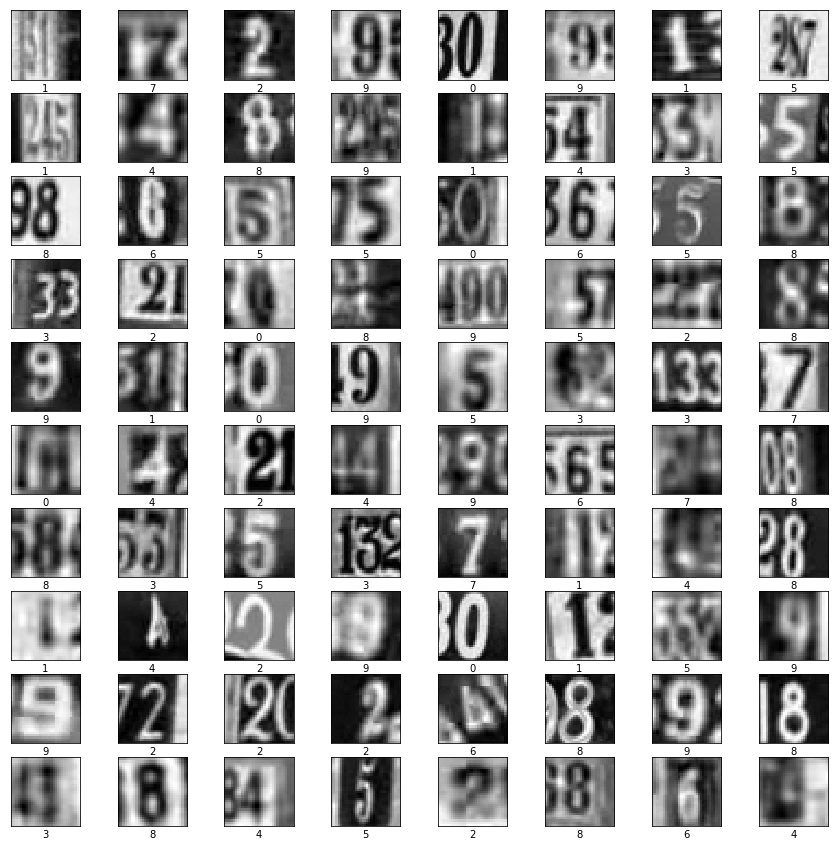

In [104]:
# Plotting the images predicted with the labels.
plt.figure(figsize=(15,15))
for i in range(80):
    plt.subplot(10,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_pred_CNN[i])
plt.show()

# Insights : Differences and trade-offs between traditional and NN classifiers with the help of classification metrics.


*   CNN performed way better then the KNN Classifier where the class level accuracy we can clearly see is mostly ~94% while in KNN class level accuracy for the model was ~53%.

*  DNN also had better accuracy with SGD ~84% which was also better then off KNN.

* However CNN outperformed the DNN and KNN both. 

* If we look at the plots visually it is clearly shown the CNN have predicted the images better

* Also tried the Image Augmentation the accuracy level also shoots up to ~96% but it was tested on another notebook.




